In [36]:
%pylab inline
from io import BytesIO
import IPython.display
import hashlib
import struct

from svgpathtools import * 
import cmath
from patterntools import *
import centercurve


Populating the interactive namespace from numpy and matplotlib


In [6]:
paths, attributes = svg2paths('base.svg')
tops = []
for i in range(1, 4):
    ipaths, iattributes = svg2paths('1t%s.svg' % i)
    tops.append(ipaths)
bottoms = []
for i in range(1, 6):
    ipaths, iattributes = svg2paths('1b%s.svg' % i)
    bottoms.append(ipaths)
    


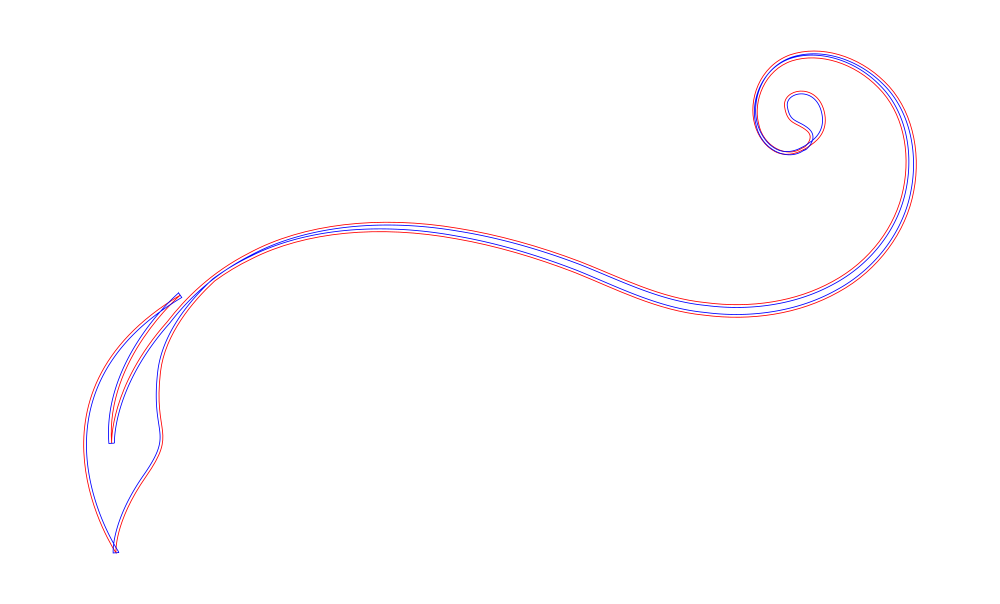

In [17]:
displaysvg([paths[0], offset_curve(paths[0], 1)], colors=[(255,0,0), (0,0,255)], mindim=1000)

In [67]:
import centercurve

res = centercurve.centerline(paths[0])

res_c = [(0,0,255)] * len(res)

displaysvg([paths[0], ], colors=[(255,0,0)] + res_c, mindim=5000)

AssertionError: 

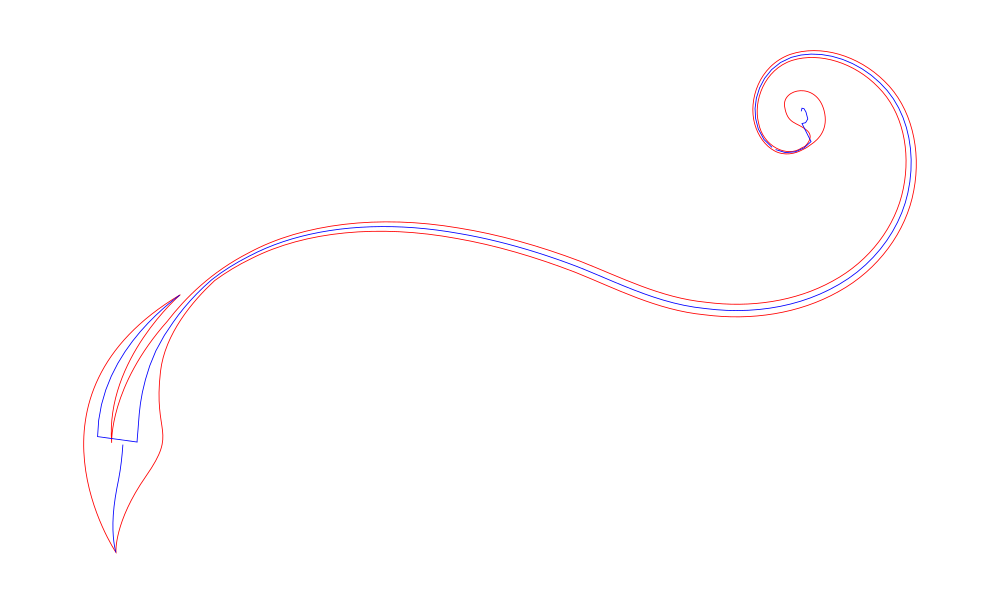

In [65]:
def _intersectionsort(i):
    ((T1, seg1, t1), (T2, seg2, t2)) = i
    return T2
def sort_intersections(intersections):
    return sorted(intersections, key=_intersectionsort)

def collapse_close_intersections(intersections):
    intersections = sort_intersections(intersections)
    out = []
    for i in range(0, len(intersections)):
        if out and misctools.isclose(out[-1][1][0], intersections[i][1][0]):
            continue
        out.append(intersections[i])
    return out

P = paths[0]

lines = []
res = []
respoint = None
for T in linspace(0, 1, len(P) * 3)[6:8]:
    p = P.point(T)
    n = P.normal(T)
    l = Line(p - n * 1, p + n*200)
    lines.append(l)
    intersections = collapse_close_intersections(P.intersect(l))
    if len(intersections) < 2:
        continue
    ((T1, seg1, t1), (T2, seg2, t2)) = intersections[1]
    if T1 < T:
        respoint = None
        continue
    centerp = (p + P.point(T1)) / 2
    if respoint is not None:
        res.append(Line(respoint, centerp))
    respoint = centerp
res = Path(*res)

markers = [marker(P.point(T1)) for l in lines for ((T1,s1,t1), (T2,s2,t2)) in P.intersect(l)]
markers_c = [(128,0,128)] * len(markers)

lines_c = [(0,128,0)] * len(lines)
displaysvg([paths[0], res] + lines + markers, colors=[(255,0,0), (0,0,255)] + lines_c + markers_c, mindim=5000)

In [64]:
len(res)

3

In [55]:
len(P.intersect(lines[0]))

3